<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_05/class_005_breast_cancer_dataset_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
# !pip install -q tensorflow==2.0.0-beta1

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [ ]:
df = pd.DataFrame(data= data.data, columns=data.feature_names)    
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 30)

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
N,D = X_train.shape

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(D,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
r = model.fit(X_train,y_train, 
              validation_data=(X_test,y_test),
              epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 0.4699 - accuracy: 0.7927 - val_loss: 0.4712 - val_accuracy: 0.7766
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.4333 - accuracy: 0.8189 - val_loss: 0.4378 - val_accuracy: 0.8245
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4023 - accuracy: 0.8399 - val_loss: 0.4073 - val_accuracy: 0.8404
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3748 - accuracy: 0.8661 - val_loss: 0.3817 - val_accuracy: 0.8457
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3508 - accuracy: 0.8766 - val_loss: 0.3590 - val_accuracy: 0.8670
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3305 - accuracy: 0.8819 - val_loss: 0.3383 - val_accuracy: 0.8723
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3125 - accuracy: 0.8950 - val_loss: 0.3206 - val_accuracy: 0.8777
Epoch 8/100

In [ ]:
print('train score=',model.evaluate(X_train,y_train))
print('test score=',model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9790
train score= [0.086837038397789, 0.9790025949478149]
6/6 [==============================] - 0s 5ms/step - loss: 0.0955 - accuracy: 0.9787
test score= [0.09545579552650452, 0.978723406791687]


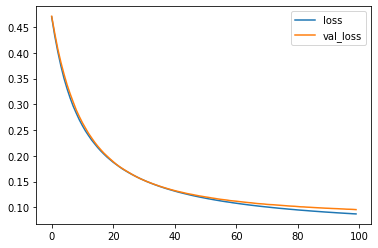

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


In [ ]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [ ]:
def classes(y):
  resp = []
  for yi in y:
    if(yi > 0.5):
      resp.append(1)
    else:
      resp.append(0)
  return resp

In [ ]:
y_calc= classes(y_calc_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test, y_calc)

array([[ 72,   4],
       [  0, 112]])

In [ ]:
# Classification Report
print('\n\n', classification_report(y_test, y_calc, target_names=data.target_names))



               precision    recall  f1-score   support

   malignant       1.00      0.95      0.97        76
      benign       0.97      1.00      0.98       112

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188

